In [1]:
import pandas as pd

In [2]:
df_matches = pd.read_csv('club_data.csv')

df_matches['diferencia_goles'] = df_matches['goles_local'] - df_matches['goles_visitante']
df_matches['ratio_tiros_posesion_local'] = df_matches['tiros_arco_local'] / df_matches['posesion_local (%)']

df_matches.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [3]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_matches[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']]
y = df_matches['goles_local']

selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X, y)

scores = selector.scores_
variables = X.columns

results = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
results

,Variable,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [4]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

importance = tree_model.feature_importances_

result_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
    }).sort_values(by='Importance', ascending=False)

result_importance

,Variable,Importance
0,posesion_local (%),0.491563
2,ratio_tiros_posesion_local,0.305755
1,tiros_arco_local,0.202683


C:\Users\jaayg\AppData\Local\Temp\ipykernel_18000\2365555316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data=results, ax=ax[0], palette='Blues_r')
C:\Users\jaayg\AppData\Local\Temp\ipykernel_18000\2365555316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=result_importance, ax=ax[1], palette='Greens_r')


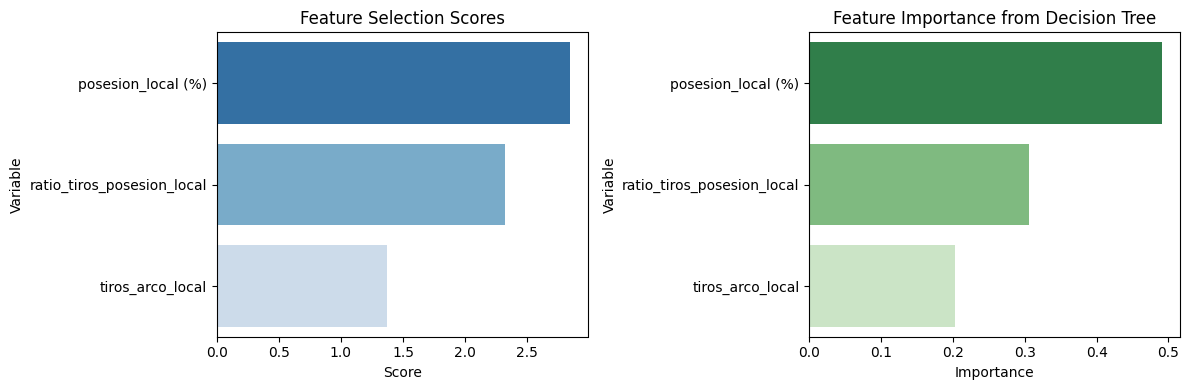

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(12, 4))

sns.barplot(x='Score', y='Variable', data=results, ax=ax[0], palette='Blues_r')
ax[0].set_title('Feature Selection Scores')

sns.barplot(x='Importance', y='Variable', data=result_importance, ax=ax[1], palette='Greens_r')
ax[1].set_title('Feature Importance from Decision Tree')

plt.tight_layout()
plt.show()